In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('loan_sanction_train.csv')

In [3]:
train_gr = df_train.groupby('Loan_Status', axis=0)
pd.DataFrame(train_gr.size(), columns=['# of observations'])

# of observations
Loan_Status                   
N                          192
Y                          422

In [ ]:
df_train.head

In [5]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df_train["Dependents"].fillna(2)

In [6]:
import numpy as np

In [18]:

df_train['Dependents'] = df_train['Dependents'].apply(lambda x: 0 if x == '3+' else x)

In [ ]:
df_train["ApplicantIncome"].fillna(5179.795107)

In [ ]:

df_train["CoapplicantIncome"].fillna(1601.916330)

In [ ]:

df_train["Credit_History"].fillna(0.84219)

In [ ]:

df_train["LoanAmount"].fillna(142.511530)

In [ ]:

df_train["Loan_Amount_Term"].fillna(342.201873)

In [ ]:

df_train["Married"].fillna("Yes")

In [ ]:

df_train["Self_Employed"].fillna("No")

In [26]:
df_train.drop(columns = ['Loan_ID'],inplace = True)

In [ ]:
df_train.head()

In [ ]:
df_train.isnull().sum()

In [29]:
df_train['Gender'] = [1 if i =='Male' else 0 for i in df_train['Gender']]

In [30]:
df_train['Married'] = [1 if i =='Yes' else 0 for i in df_train['Married']]

In [31]:
df_train['Education'] = [1 if i =='Graduate' else 0 for i in df_train['Education']]

In [32]:
df_train['Self_Employed'] = [1 if i =='Yes' else 0 for i in df_train['Self_Employed']]

In [33]:
df_train['Property_Area'] = [1 if i =='Urban' else 0 for i in df_train['Property_Area']]

In [11]:
df_train.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

HANDLING OUTLIERS

as we expected ApplicantIncome and CoapplicantIncome have extreme outliers


In [12]:
df_train[df_train['CoapplicantIncome']<10000].shape


(608, 13)

In [13]:
import seaborn as sns

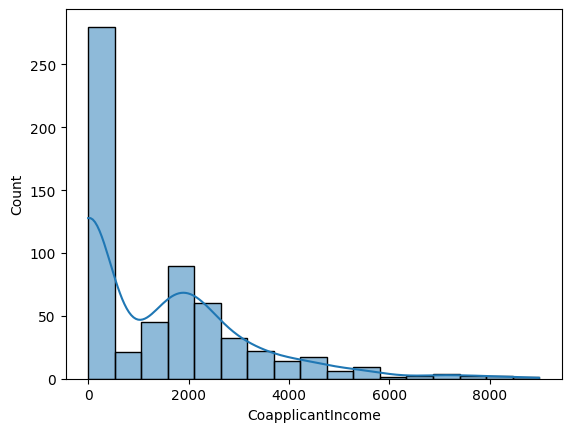

In [14]:
sns.histplot(df_train[df_train['CoapplicantIncome']<10000]['CoapplicantIncome'], kde=True);


In [ ]:
df_train = df_train[df_train['CoapplicantIncome']<10000]

for col in ['LoanAmount','ApplicantIncome']:
    df_train[col] = df_train[col].apply(np.log1p)

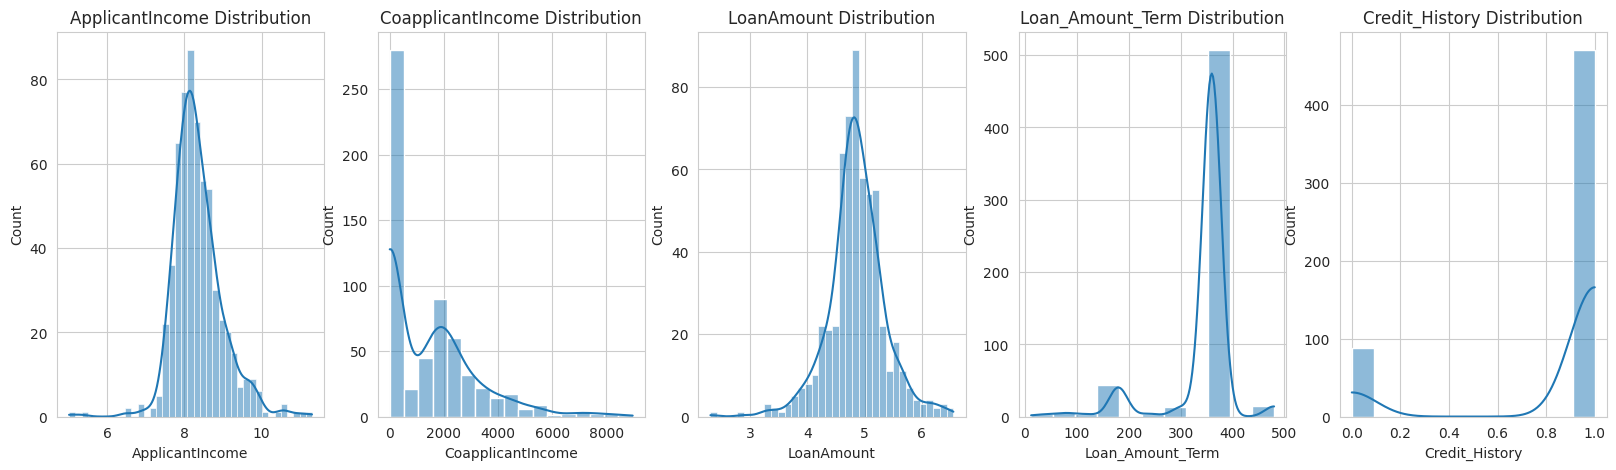

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
num_features = df_train.select_dtypes('number')
fig,ax = plt.subplots(1,5,figsize=(20,5))

for i,feature in enumerate(num_features):
    sns.histplot(data=df_train,x=feature,ax=ax[i],kde=True)
    ax[i].set_title(f'{feature} Distribution')

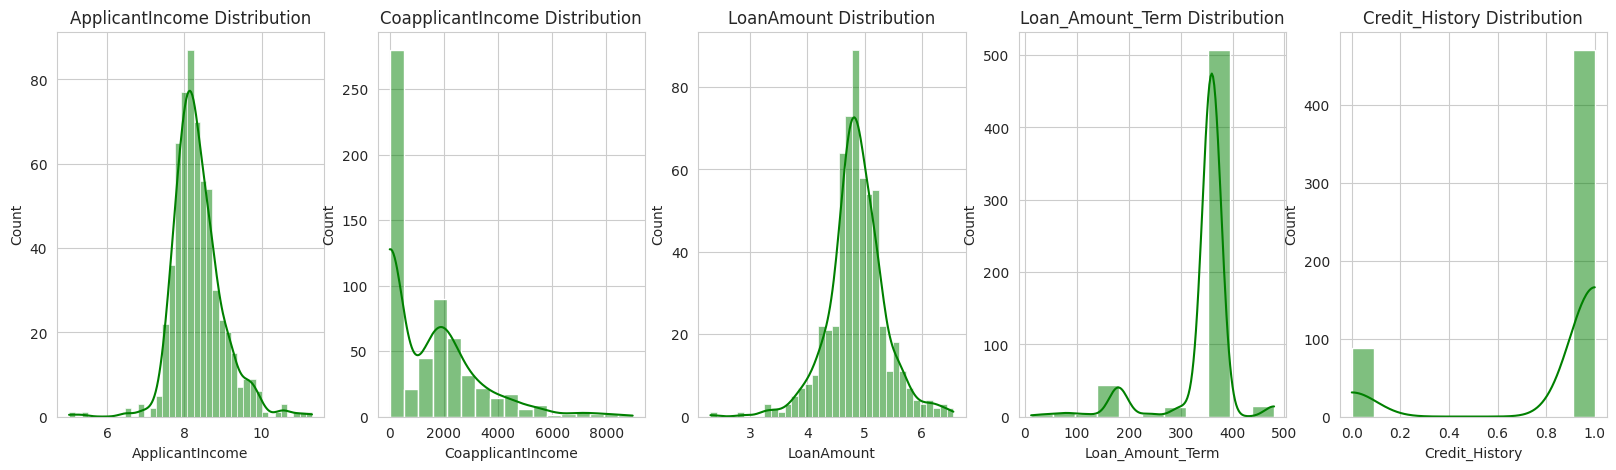

In [41]:
fig,ax = plt.subplots(1,5,figsize=(20,5))

for i,feature in enumerate(num_features):
    sns.histplot(data=df_train,x=feature,ax=ax[i],kde=True,color='Green')
    ax[i].set_title(f'{feature} Distribution')

## **BINNING**

In [ ]:
import pandas as pd
import numpy as np


df_train['ApplicantIncome_bin'] = pd.cut(x=df_train['ApplicantIncome'], bins=[150, 2877.5, 3812.5, 5403.459, 5795.00,81000],
labels=[0,1,2,3,4])


print(df_train)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

CROSS VALIDATION

In [26]:
import numpy as np
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model, X, y, cv=10)


In [ ]:
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.81481481 0.83333333 0.77777778 0.75925926 0.81481481 0.77777778
 0.88888889 0.87037037 0.81132075 0.88679245]
Mean CV Score: 0.8235150244584206


In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.metrics import recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [28]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train.head()

In [22]:
df = df_train.drop(columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area'])

In [ ]:
df.head()

In [24]:
df1 = df.dropna()

## **Logistic Regression**

In [29]:
#Split in 80% train and 20% test set
train_df, test_df = train_test_split(df1, test_size = 0.2, random_state= 42)

#Separate target label
y_train = train_df['Loan_Status']
y_test  = test_df['Loan_Status']

#Drop target label
X_train = train_df.drop(['Loan_Status'], axis = 1)
X_test = test_df.drop(['Loan_Status'],   axis = 1)

In [30]:
from sklearn.linear_model import LogisticRegression

# Apply logistic regression model to training data
logreg_model = LogisticRegression(solver='liblinear', random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [31]:
# We shall use GridSearchCV with CrossValidation in order to determine the best hyperparameter
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l2']},
              {'C':[0.01, 0.1, 0.2, 10, 100]}]


grid_search = GridSearchCV(estimator = logreg_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

# performing grid search on the training data set
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'penalty': ['l2']}, {'C': [0.01, 0.1, 0.2, 10, 100]}],
             scoring='accuracy')

In [32]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8279


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=42, solver='liblinear')


In [33]:
# calculate GridSearch CV score on test set
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8056


In [34]:
from sklearn.linear_model import LogisticRegression

# Apply logistic regression model to training data
model = LogisticRegression(penalty='l2',C = 100,random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0)

In [35]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.8055555555555556


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['Y','N']
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [37]:
X = df1.drop(columns=['Loan_Status'])
y = df1['Loan_Status']
print(X.shape)
print(y.shape)

(538, 4)
(538,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y)
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

y_train_pred = model.predict(x_train)
y_test_pred  = model.predict(x_test)

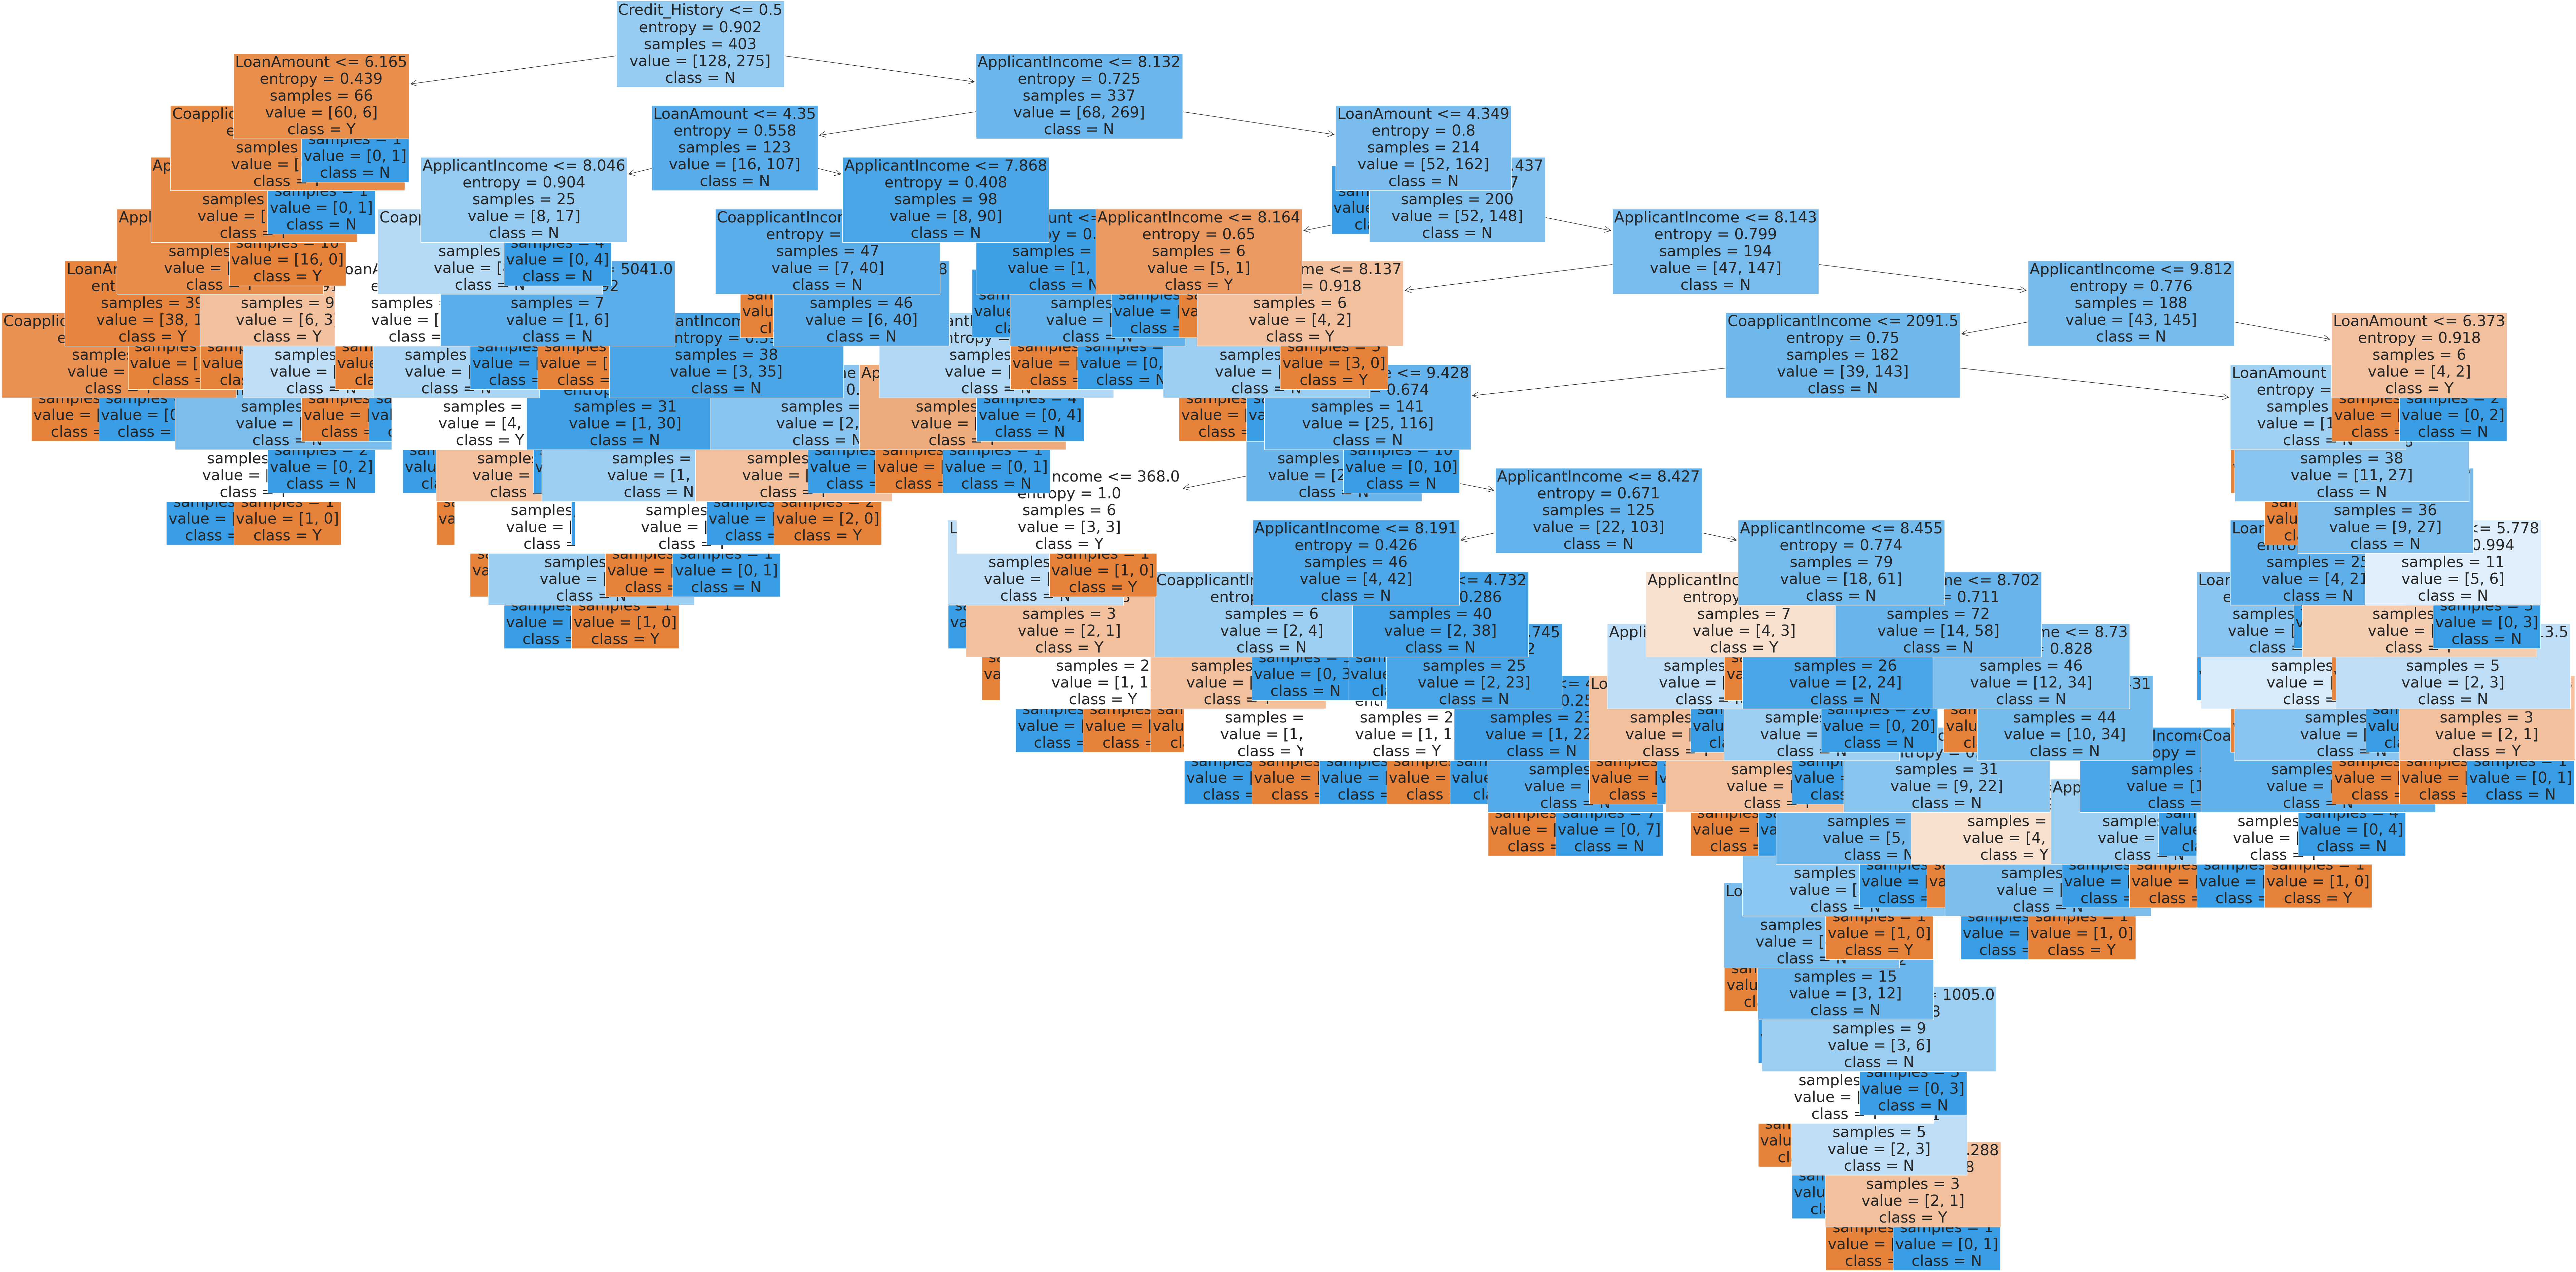

In [ ]:
#figsize value changes the size of plot
fig, ax = plt.subplots(figsize=(96, 48), dpi=100)
features = df1.columns
classes = ['Y','N']

tree.plot_tree(model,ax=ax,feature_names=features,class_names=classes, filled=True, fontsize=32)
plt.show()

In [ ]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    # When annot is set to True, it adds text annotations to each cell of the heatmap.
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Test score 0.725925925925926
Train Confusion matrix


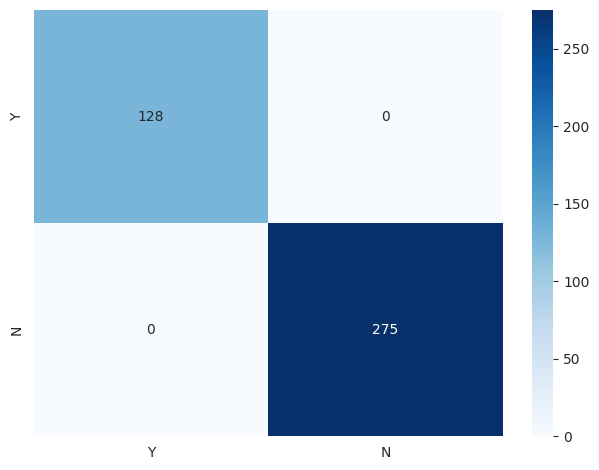

Test Confusion matrix


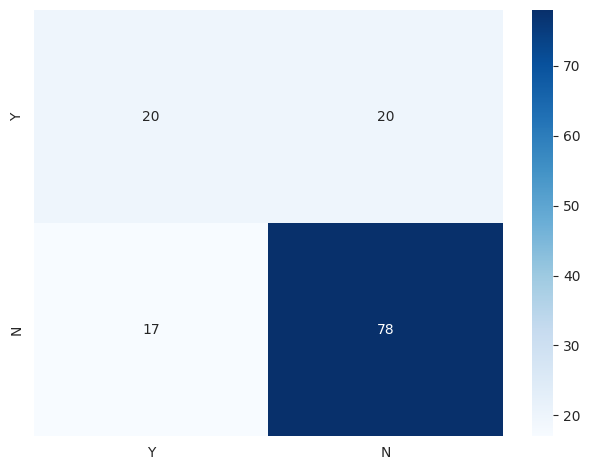

In [ ]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

Pre PRUNNING

In [ ]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
model = gcv.best_estimator_
print("Best Fit Model")
print(model)

Best Fit Model
DecisionTreeClassifier(max_depth=2)


Train score 0.8238213399503722
Test score 0.8074074074074075
Train Confusion matrix


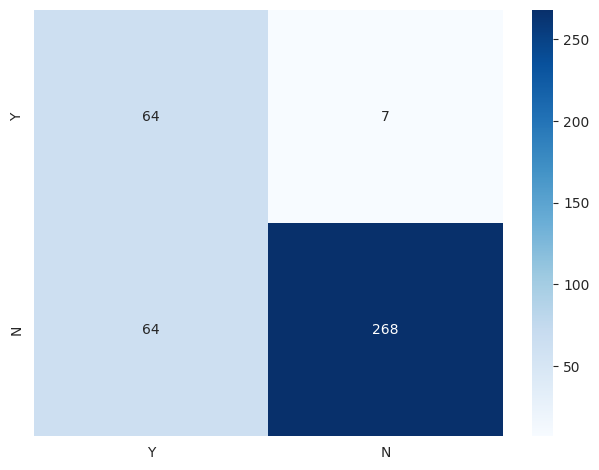

Test Confusion matrix


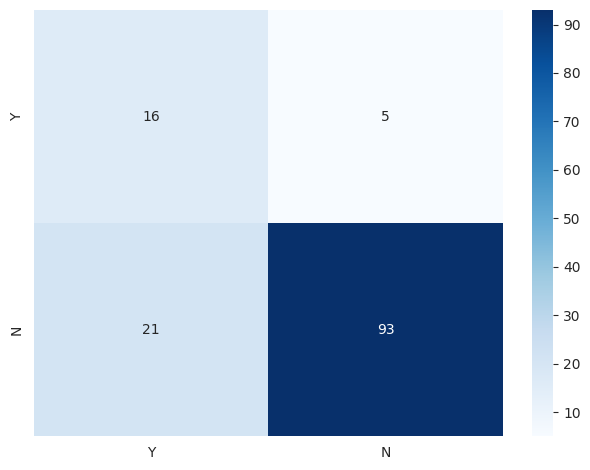

In [ ]:
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

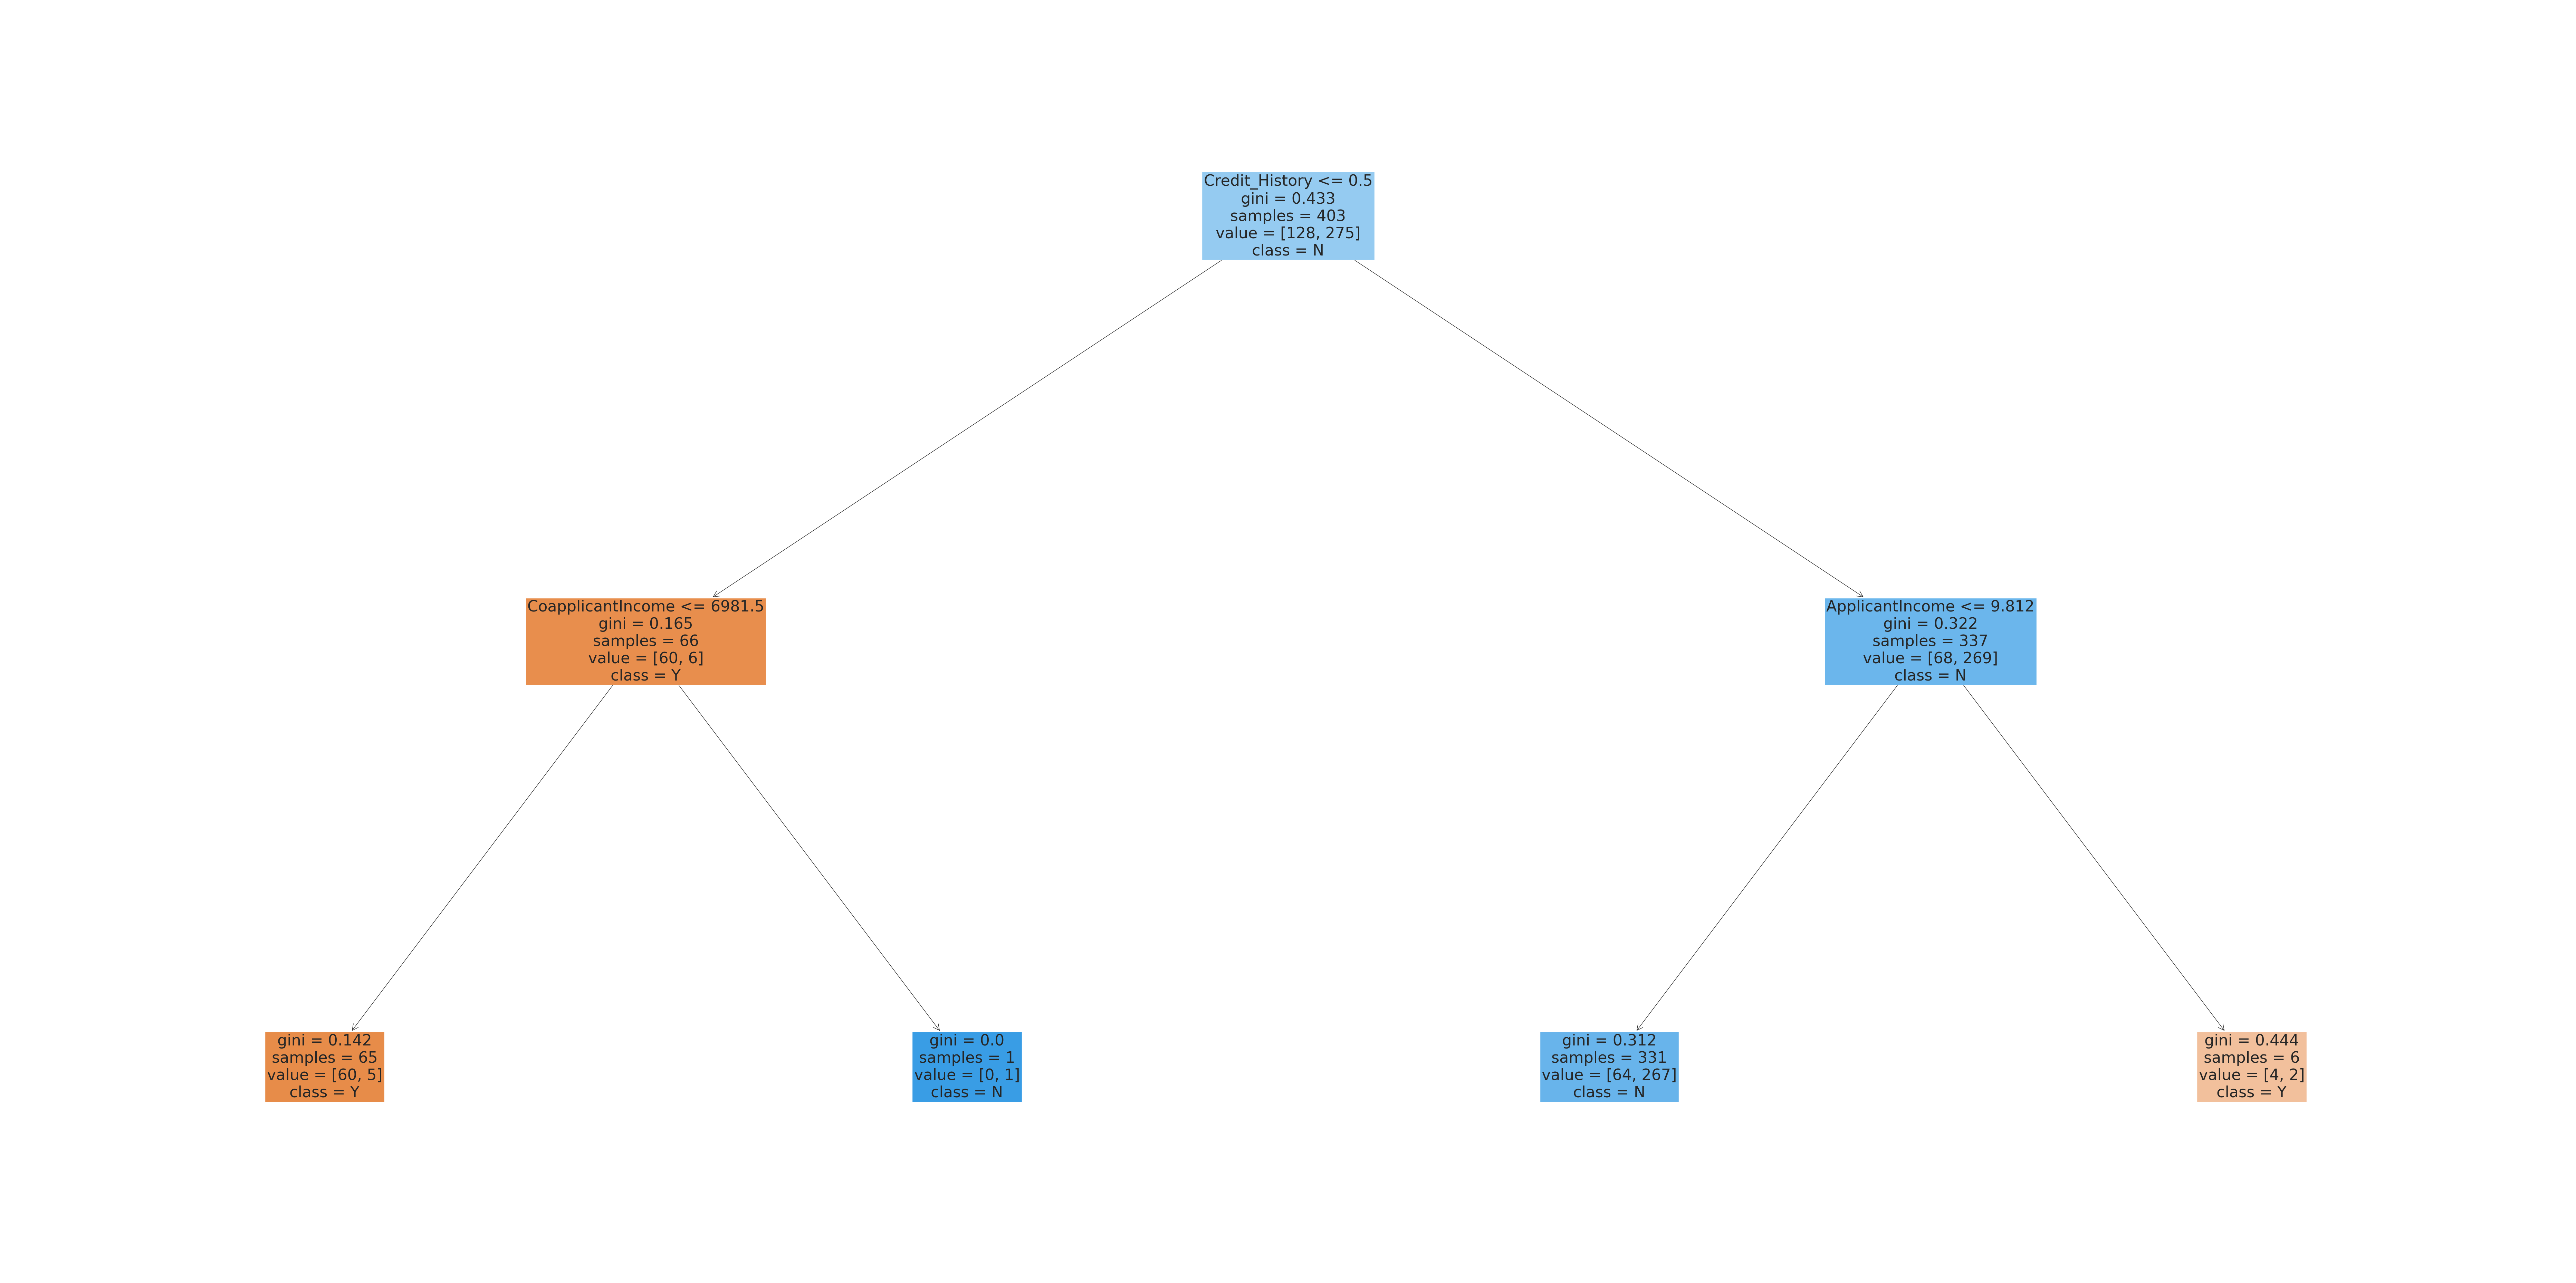

In [ ]:
fig, ax = plt.subplots(figsize=(96, 48), dpi=100)
features = df1.columns
classes = ['Y','N']

tree.plot_tree(model,ax=ax,feature_names=features,class_names=classes, filled=True, fontsize=32)
plt.show()

POST PRUNNING

In [ ]:
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00416457 0.00655196 0.13702946]


In [ ]:
# For each alpha we will append our model to a list
models = []
for ccp_alpha in ccp_alphas:
    model = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)

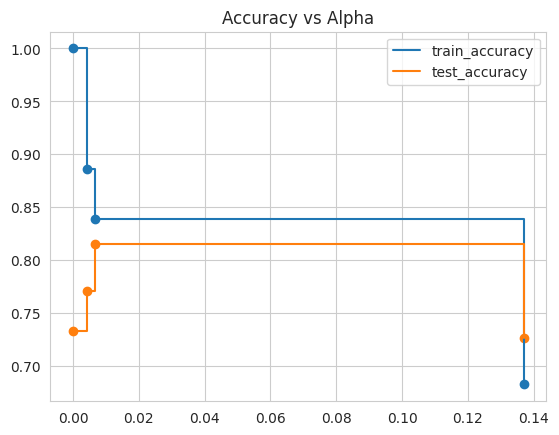

In [ ]:
train_acc = []
test_acc  = []

# The code iterates through trained models, predicting
# and storing their accuracy on both training and testing data.
# It uses scatter plots to show individual accuracies for each alpha value.
# Step plots connect accuracy points to visualize the trend as model complexity changes.
# The resulting graph, titled 'Accuracy vs Alpha', helps identify
# the optimal balance between model simplicity and accuracy.

for m in models:
    y_train_pred = m.predict(x_train)
    y_test_pred = m.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

Train score 0.8163771712158809
Test score 0.8444444444444444
Train Confusion matrix


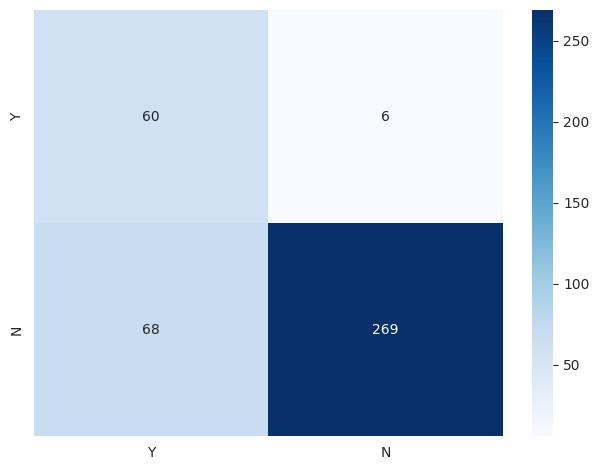

Test Confusion matrix


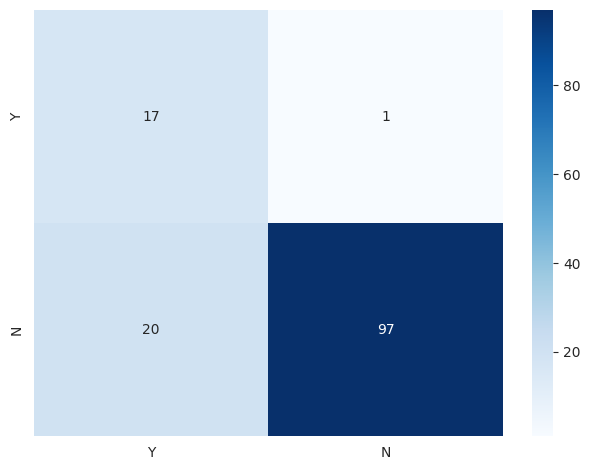

In [ ]:
model = tree.DecisionTreeClassifier(random_state=42,ccp_alpha=0.008)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

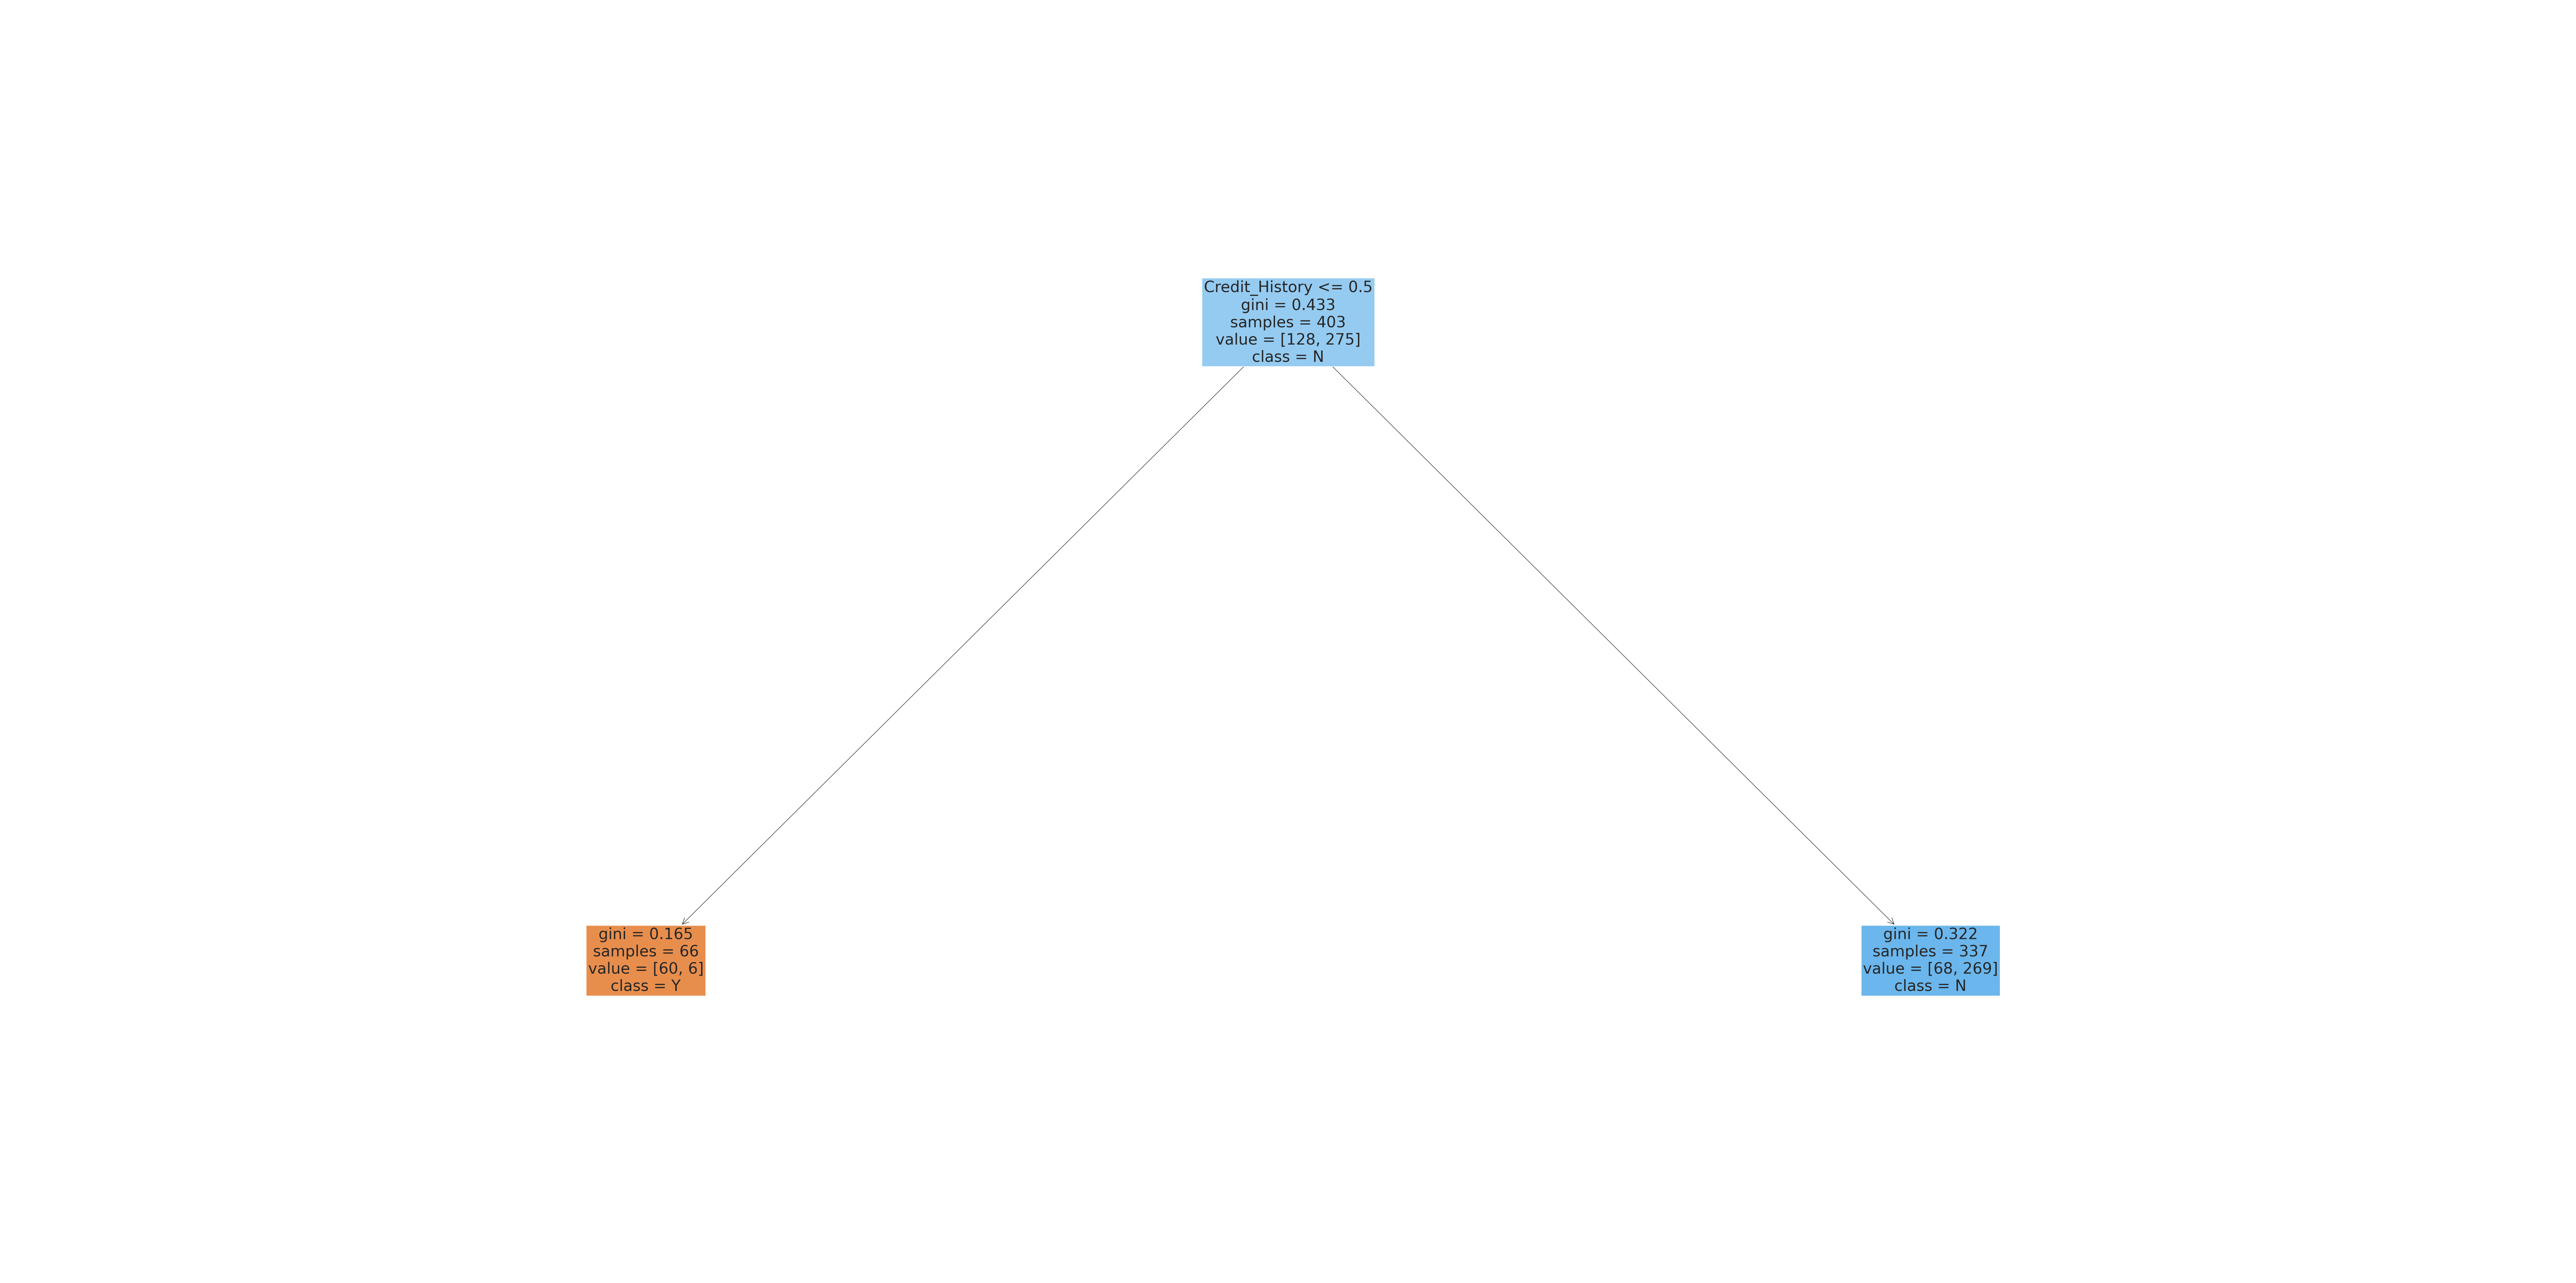

In [ ]:
fig, ax = plt.subplots(figsize=(96, 48), dpi=100)
features = df1.columns
classes = ['Y','N']

tree.plot_tree(model,ax=ax,feature_names=features,class_names=classes, filled=True, fontsize=32)
plt.show()

### **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier

rfc = RandomForestClassifier(n_estimators=10,random_state=0)



# fit the model

rfc.fit(x_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(x_test)



# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7891


In [ ]:

rfc_100 = RandomForestClassifier(n_estimators=40, random_state=0)



# fit the model to the training set

rfc_100.fit(x_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(x_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7969


In [ ]:
#create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:

feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

Credit_History       0.271645
LoanAmount           0.216809
ApplicantIncome      0.208912
CoapplicantIncome    0.106663
Loan_Amount_Term     0.043672
Dependents           0.034726
Married              0.026020
Education            0.025440
Property_Area        0.023331
Gender               0.022690
Self_Employed        0.020092
dtype: float64

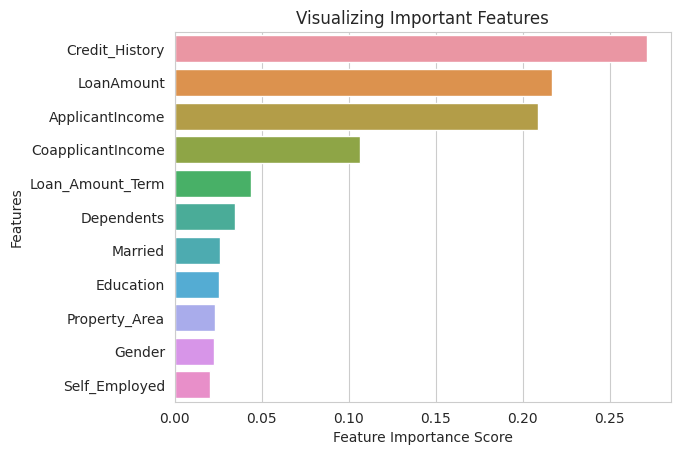

In [ ]:

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()